In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
display (os.getcwd())

'C:\\Users\\Harsha Marishetty'

In [12]:
os.chdir('C:\\Users\\Harsha Marishetty\\Downloads\\')

In [14]:
df = pd.read_csv("Dataset .csv")
display (df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [15]:
print(df.columns)
print(df.head())
print(df.info())

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chin

In [16]:
# Task 01: Restaurant Reviews
from collections import Counter
print("Unique Rating text values:", df['Rating text'].unique())
positive_ratings = ['Excellent', 'Very Good', 'Good']
negative_ratings = ['Poor', 'Average']
positive_df = df[df['Rating text'].isin(positive_ratings)]
negative_df = df[df['Rating text'].isin(negative_ratings)]
pos_review_keywords = positive_df['Rating text'].value_counts()
neg_review_keywords = negative_df['Rating text'].value_counts()
def get_cuisine_counts(dataframe):
    cuisines = dataframe['Cuisines'].dropna().str.split(', ')
    all_cuisines = [cuisine for sublist in cuisines for cuisine in sublist]
    return Counter(all_cuisines).most_common(10)
pos_cuisine_keywords = get_cuisine_counts(positive_df)
neg_cuisine_keywords = get_cuisine_counts(negative_df)
print("Positive Rating Text Counts:\n", pos_review_keywords)
print("Negative Rating Text Counts:\n", neg_review_keywords)
print("Top Positive Cuisines:\n", pos_cuisine_keywords)
print("Top Negative Cuisines:\n", neg_cuisine_keywords)

Unique Rating text values: ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']
Positive Rating Text Counts:
 Rating text
Good         2100
Very Good    1079
Excellent     301
Name: count, dtype: int64
Negative Rating Text Counts:
 Rating text
Average    3737
Poor        186
Name: count, dtype: int64
Top Positive Cuisines:
 [('North Indian', 1076), ('Chinese', 772), ('Italian', 550), ('Fast Food', 513), ('Continental', 504), ('Cafe', 429), ('Desserts', 319), ('American', 288), ('Mughlai', 270), ('Bakery', 221)]
Top Negative Cuisines:
 [('North Indian', 1941), ('Chinese', 1412), ('Fast Food', 1050), ('Mughlai', 524), ('South Indian', 338), ('Bakery', 315), ('Street Food', 255), ('Desserts', 224), ('Cafe', 205), ('Continental', 195)]


In [18]:
df['Review Length'] = df['Rating text'].astype(str).apply(len)
avg_length = df['Review Length'].mean()
print(f"Average length of Rating text: {avg_length:.2f}")
correlation = df['Review Length'].corr(df['Aggregate rating'])
print(f"Correlation between length and rating: {correlation:.2f}")
print(df.groupby('Review Length')['Aggregate rating'].mean())
print(df['Rating text'].unique())
print(df.groupby('Rating text')['Review Length'].mean())

Average length of Rating text: 7.02
Correlation between length and rating: -0.48
Review Length
4    3.570691
7    3.051619
9    1.672336
Name: Aggregate rating, dtype: float64
['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']
Rating text
Average      7.0
Excellent    9.0
Good         4.0
Not rated    9.0
Poor         4.0
Very Good    9.0
Name: Review Length, dtype: float64


In [19]:
# Task 02 : Votes Analysis
max_votes_idx = df['Votes'].idxmax()
highest_votes_restaurant = df.loc[max_votes_idx, ['Restaurant Name', 'Votes', 'City']]
# restaurants with lowest votes
min_votes = df['Votes'].min()
lowest_votes_restaurants = df[df['Votes'] == min_votes][['Restaurant Name', 'Votes', 'City']]
top_5_votes = df.sort_values(by='Votes', ascending=False).head(5)[['Restaurant Name', 'Votes', 'City']]
print("Restaurant with Highest Votes:")
print(highest_votes_restaurant)
print("\nTop 5 Restaurants by Votes:")
print(top_5_votes)
print(f"\nMinimum Votes: {min_votes}")
print(f"Number of restaurants with {min_votes} votes: {len(lowest_votes_restaurants)}")
print("Sample of restaurants with lowest votes:")
print(lowest_votes_restaurants.head())

Restaurant with Highest Votes:
Restaurant Name         Toit
Votes                  10934
City               Bangalore
Name: 728, dtype: object

Top 5 Restaurants by Votes:
                Restaurant Name  Votes       City
728                        Toit  10934  Bangalore
735                    Truffles   9667  Bangalore
3994           Hauz Khas Social   7931  New Delhi
2412                  Peter Cat   7574    Kolkata
739   AB's - Absolute Barbecues   6907  Bangalore

Minimum Votes: 0
Number of restaurants with 0 votes: 1094
Sample of restaurants with lowest votes:
        Restaurant Name  Votes        City
69     Cantinho da Gula      0  S��o Paulo
874       The Chaiwalas      0   Faridabad
879  Fusion Food Corner      0   Faridabad
880       Punjabi Rasoi      0   Faridabad
887       Baskin Robbin      0   Faridabad


Correlation between Votes and Aggregate Rating: 0.3137

Average Votes by Rating Range:
Rating Bin
0-1           NaN
1-2    144.200000
2-3     38.991010
3-4    162.152005
4-5    637.413824
Name: Votes, dtype: float64


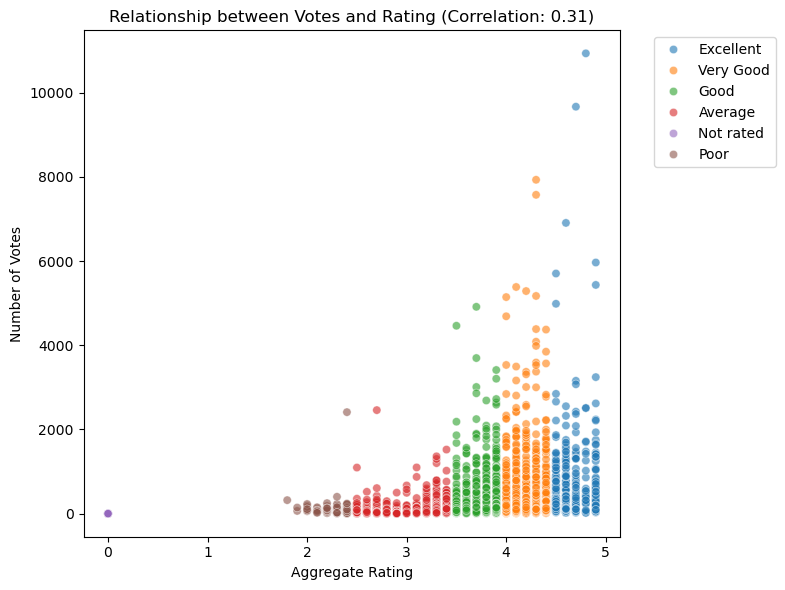

In [27]:
import seaborn as sns
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Votes and Aggregate Rating: {correlation:.4f}")
plt.figure(figsize=(8,6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.6, hue='Rating text')
plt.title(f'Relationship between Votes and Rating (Correlation: {correlation:.2f})')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('votes_vs_rating_correlation.png')
df['Rating Bin'] = pd.cut(df['Aggregate rating'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
avg_votes_by_rating = df.groupby('Rating Bin')['Votes'].mean()
print("\nAverage Votes by Rating Range:")
print(avg_votes_by_rating)

Percentage of Online Delivery by Price Range:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery Bool, dtype: float64

Percentage of Table Booking by Price Range:
Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking Bool, dtype: float64


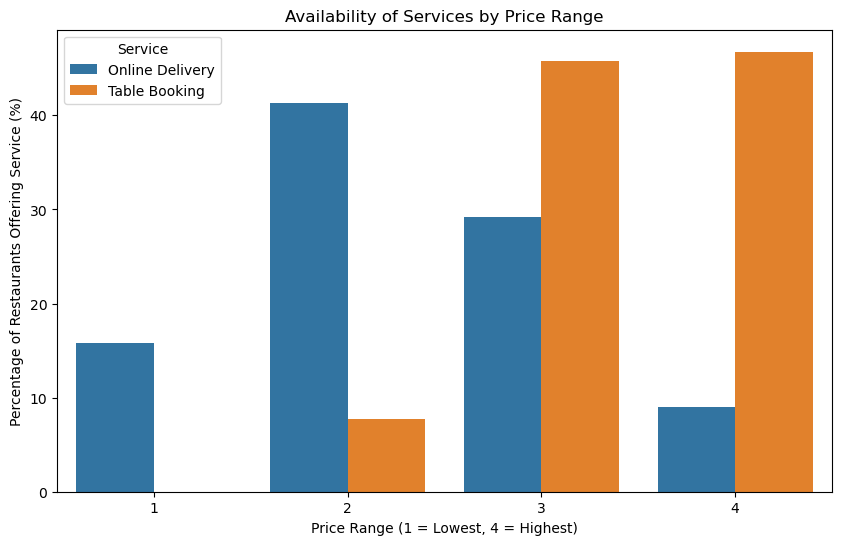

In [28]:
# Task 03: Price Range vs. Online Delivery and Table Booking
df['Has Online delivery Bool'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking Bool'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
delivery_by_price = df.groupby('Price range')['Has Online delivery Bool'].mean() * 100
booking_by_price = df.groupby('Price range')['Has Table booking Bool'].mean() * 100

print("Percentage of Online Delivery by Price Range:")
print(delivery_by_price)
print("\nPercentage of Table Booking by Price Range:")
print(booking_by_price)

#plotting (melted for seaborn)
plot_data = df.groupby('Price range')[['Has Online delivery Bool', 'Has Table booking Bool']].mean().reset_index()
plot_data = plot_data.melt(id_vars='Price range', var_name='Service', value_name='Proportion')
plot_data['Percentage'] = plot_data['Proportion'] * 100
plot_data['Service'] = plot_data['Service'].replace({
    'Has Online delivery Bool': 'Online Delivery',
    'Has Table booking Bool': 'Table Booking'
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Percentage', hue='Service', data=plot_data)
plt.title('Availability of Services by Price Range')
plt.ylabel('Percentage of Restaurants Offering Service (%)')
plt.xlabel('Price Range (1 = Lowest, 4 = Highest)')
plt.legend(title='Service')
plt.show()

In [29]:
df['Has Online delivery Bool'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking Bool'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
correlations = df[['Price range', 'Has Online delivery Bool', 'Has Table booking Bool']].corr()
print("Correlation Matrix:")
print(correlations['Price range'])

Correlation Matrix:
Price range                 1.000000
Has Online delivery Bool    0.077918
Has Table booking Bool      0.501925
Name: Price range, dtype: float64
